In [1]:
import pandas as pd
import numpy as np

# Import Libraries

In [2]:
incidence_df = pd.read_csv("data/incidence_per_1000_pop_at_risk.csv")
reported_df = pd.read_csv("data/reported_numbers.csv")

# Data Scan

## incidence dataset

##### display first row rows of dataset

In [3]:
incidence_df.head(5)

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe


##### display randomly selected rows from datatset

In [4]:
incidence_df.sample(5)

,Country,Year,No. of cases,WHO Region
1412,Colombia,2005,17.68,Americas
256,Guinea,2016,331.47,Africa
1314,Ecuador,2006,24.07,Americas
1450,Mali,2005,431.24,Africa
527,United Republic of Tanzania,2014,118.94,Africa


##### return the number of rows and columns in the datatset

In [5]:
incidence_df.shape

(2033, 4)

##### return information on dataset

In [6]:
incidence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       2033 non-null   object 
 1   Year          2033 non-null   int64  
 2   No. of cases  2033 non-null   float64
 3   WHO Region    2033 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 63.7+ KB


return datatypes for each column

In [7]:
incidence_df.dtypes

Country          object
Year              int64
No. of cases    float64
WHO Region       object
dtype: object

## reported dataset

##### display first row rows of dataset

In [8]:
reported_df.head(5)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


##### display randomly selected rows from datatset

In [9]:
reported_df.sample(5)

,Country,Year,No. of cases,No. of deaths,WHO Region
123,Cabo Verde,2016,48.0,1.0,Africa
1512,Afghanistan,2003,360940.0,NaN,Eastern Mediterranean
1348,Kenya,2005,NaN,44328.0,Africa
811,Liberia,2010,922173.0,1422.0,Africa
1482,Republic of Korea,2004,864.0,0.0,Western Pacific


##### return the number of rows and columns in the datatset

In [10]:
reported_df.shape

(1944, 5)

##### return information on dataset

In [11]:
reported_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


- dataset contains null values in two of the columns

##### return datatypes for each column

In [12]:
reported_df.dtypes

Country           object
Year               int64
No. of cases     float64
No. of deaths    float64
WHO Region        object
dtype: object

# Data Cleaning

#### missing data

In [13]:
incidence_df.isnull().sum()

Country         0
Year            0
No. of cases    0
WHO Region      0
dtype: int64

In [14]:
reported_df.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

In [15]:
reported_df = reported_df.dropna()

#### renaming columns for easy analysis

In [16]:
incidence_df.rename(columns = {"Country":"country","Year":"year","No. of cases":"no_of_cases","WHO Region":"who_region"}, inplace=True)
reported_df.rename(columns = {"Country":"country","Year":"year","No. of cases":"no_of_cases","No. of deaths":"no_of_deaths","WHO Region":"who_region"}, inplace=True)

#### correct or change float dtypes to int datatypes

In [17]:
reported_df.no_of_cases=reported_df.no_of_cases.astype(int)
reported_df.no_of_deaths=reported_df.no_of_deaths.astype(int)
incidence_df.no_of_cases=incidence_df.no_of_cases.astype(int)

# Data analysis and visualization

## Analysis

In [18]:
regions = reported_df.groupby(["who_region"])[["no_of_cases","no_of_deaths"]].sum().reset_index()
regions

,who_region,no_of_cases,no_of_deaths
0,Africa,545111852,1480850
1,Americas,13433321,11039
2,Eastern Mediterranean,15841260,26764
3,Europe,112675,25
4,South-East Asia,38305249,49802
5,Western Pacific,6709491,18330


lets do same for the countries

In [19]:
countries = reported_df.groupby(["country"])[["no_of_cases", "no_of_deaths"]].sum().reset_index()
countries.head(5)

,country,no_of_cases,no_of_deaths
0,Afghanistan,1045271,363
1,Algeria,1044,4
2,Angola,26006152,125364
3,Argentina,2098,2
4,Armenia,355,0


#### analysis for Ghana over the years

In [54]:
years = reported_df.groupby(["year"])[["no_of_cases","no_of_deaths"]].sum().reset_index()
years.year = years.year.astype(str)
years

,year,no_of_cases,no_of_deaths
0,2000,5279182,21419
1,2001,5534764,26162
2,2002,5335247,70683
3,2003,8243454,91247
4,2004,9389638,87926
5,2005,11170319,76842
6,2006,11898896,78995
7,2007,13365529,76904
8,2008,13395349,87024
9,2009,17454477,115694


#### top twenty countries with most incidences per 1000

In [101]:
# Sort countries by number of cases and take the top 20
incidence_countries = incidence_df[incidence_df["year"]==2018][["country","no_of_cases"]][::-1]
incidence_countries.sort_values("no_of_cases",ascending=False).head(20)

,country,no_of_cases
78,Rwanda,486
13,Burkina Faso,398
59,Mali,386
8,Benin,386
55,Liberia,361
68,Niger,356
18,Central African Republic,347
25,Côte d'Ivoire,330
82,Sierra Leone,320
27,Democratic Republic of the Congo,319


In [105]:
incidence_gh_years = incidence_df[incidence_df["country"]=="Ghana"][["year","no_of_cases"]][::-1]
incidence_gh_years.year = incidence_gh_years.year.astype(str)

## Visualisation

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

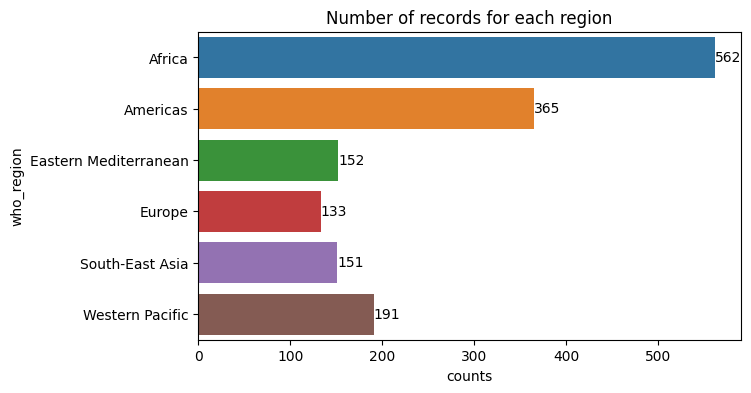

In [32]:
regions1 = reported_df.groupby(["who_region"]).size().reset_index(name="counts")

plt.figure(figsize=(7, 4))
fig = sns.barplot(data=regions1,
             y="who_region",x="counts", 
             hue="who_region")
# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar, fmt='%d')
fig.set_title("Number of records for each region")
plt.show()

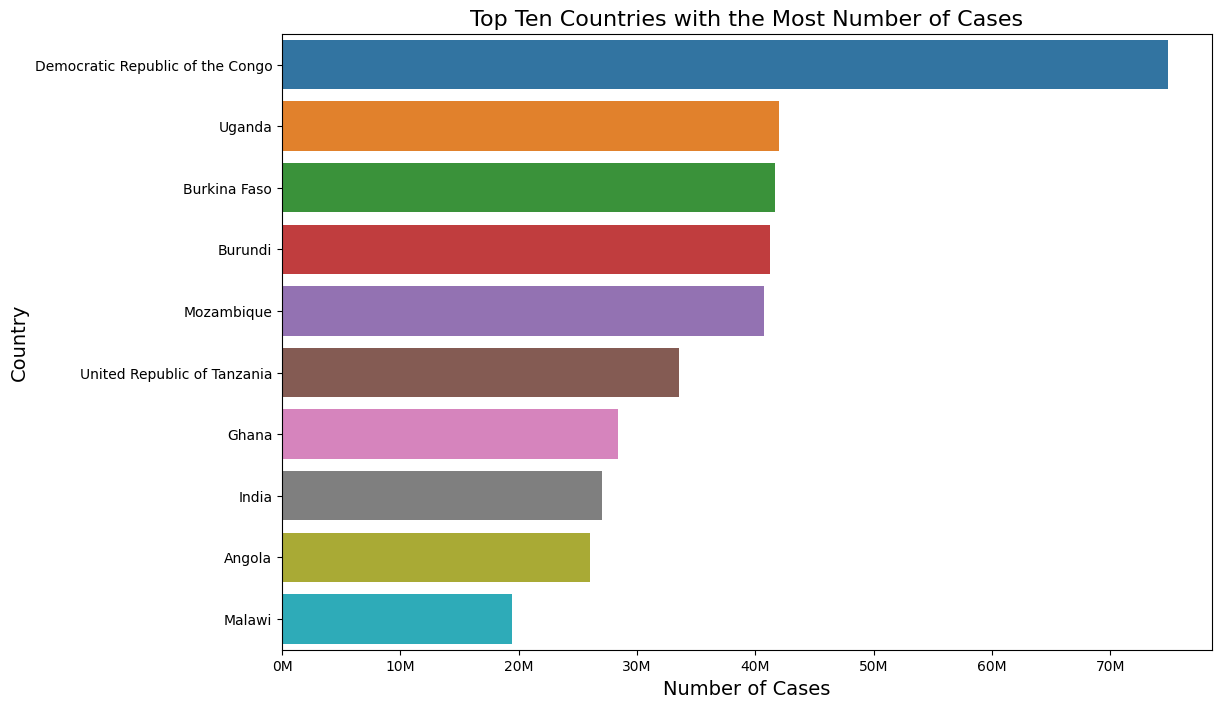

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Sort countries by number of cases and take the top 10
countries1 = countries.sort_values("no_of_cases", ascending=False).head(10)

# Set plot size
plt.figure(figsize=(12, 8))

# Create the barplot
fig = sns.barplot(data=countries1, y="country", x="no_of_cases", hue="country")

# Format the x-axis labels to display in millions (e.g., 10M, 20M)
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

fig.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title and labels
fig.set_title("Top Ten Countries with the Most Number of Cases", fontsize=16)
fig.set_xlabel("Number of Cases", fontsize=14)
fig.set_ylabel("Country", fontsize=14)

# Display the plot
plt.show()


#### Records for Each Region

#### Top Ten Countries with the most number of cases

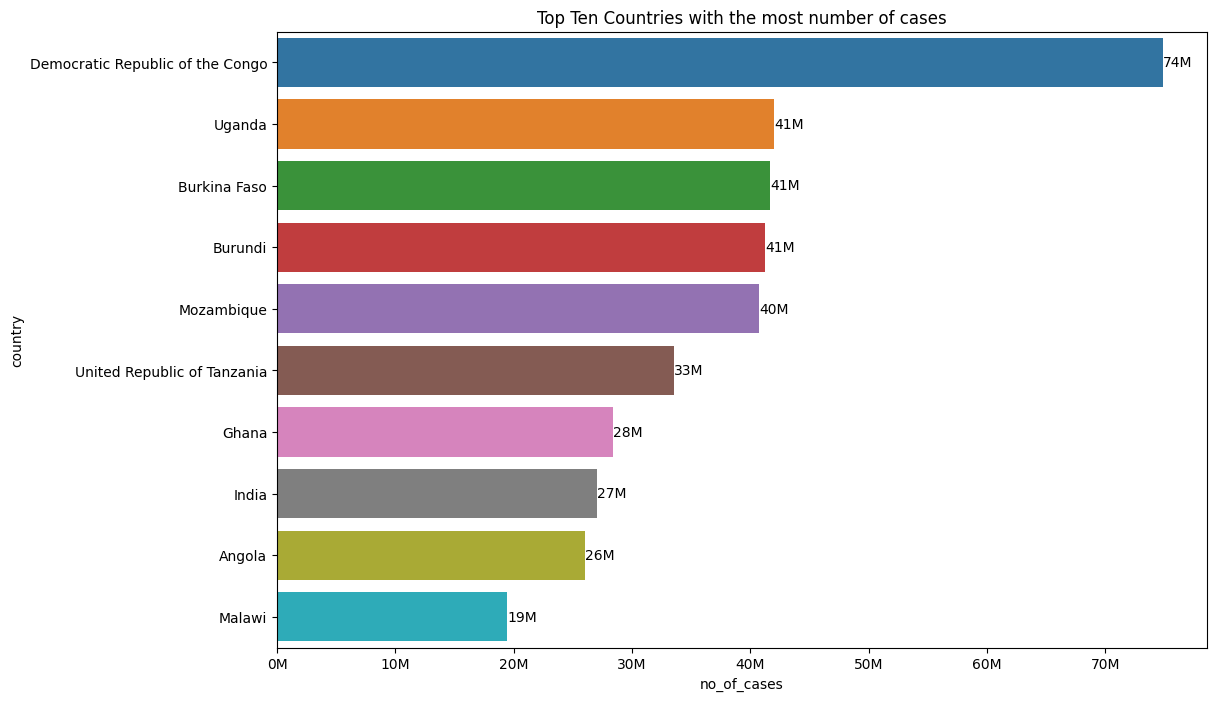

In [47]:
# Sort countries by number of cases and take the top 10
countries1 = countries.sort_values("no_of_cases", ascending=False).head(10)

# Set plot size
plt.figure(figsize=(12,8))

# Create the barplot
fig = sns.barplot(data=countries1,
             y="country",x="no_of_cases", hue="country")

# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar,fmt="%d", labels=[f'{int(val/1_000_000)}M' for val in bar.datavalues])

# Format the x-axis labels to display in millions (e.g., 10M, 20M)
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'
fig.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Top Ten Countries with the most number of cases")

# Display the plot
plt.show()

#### Top Ten Countries with the most number of Deaths

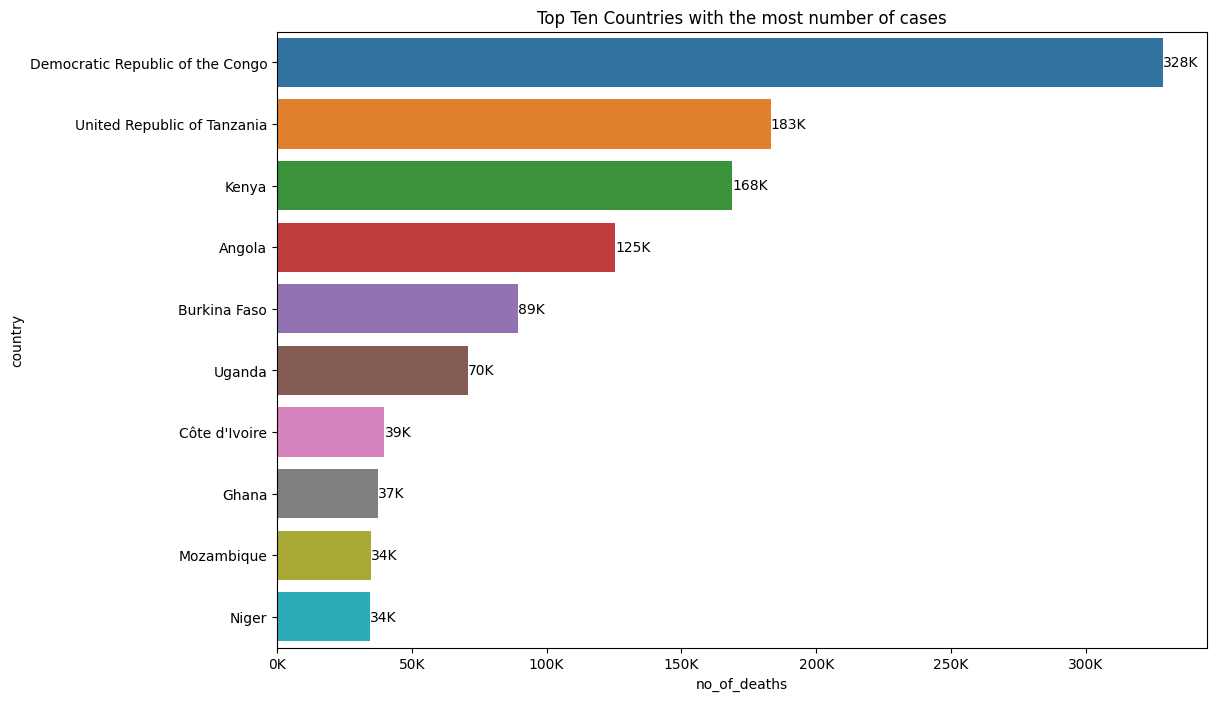

In [51]:
# Sort countries by number of cases and take the top 10
countries1 = countries.sort_values("no_of_deaths", ascending=False).head(10)

# Set plot size
plt.figure(figsize=(12,8))

# Create the barplot
fig = sns.barplot(data=countries1,
             y="country",x="no_of_deaths", hue="country")

# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar,fmt="%d", labels=[f'{int(val/1_000)}K' for val in bar.datavalues])

# Format the x-axis labels to display in thousands (e.g., 10K, 20K)
def millions_formatter(x, pos):
    return f'{int(x / 1_000)}K'
fig.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Top Ten Countries with the most number of deaths")

# Display the plot
plt.show()

#### Data over the years

##### Malaria Cases over the years

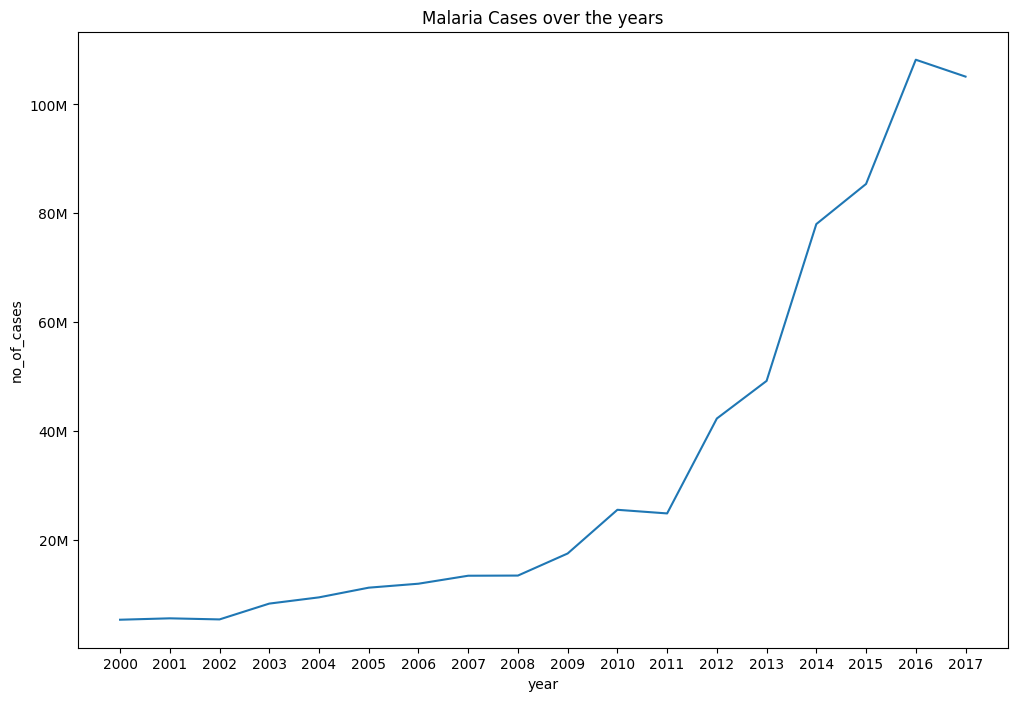

In [59]:
# Set plot size
plt.figure(figsize=(12,8))

# Create the lineplot
fig = sns.lineplot(years, x = "year", y = "no_of_cases")

# Format the y-axis labels to display in millions (e.g., 10M, 20M)
def millions_formatter(y, pos):
    return f'{int(y / 1_000_000)}M'
fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Malaria Cases over the years")

# Display the plot
plt.show()

##### Malaria Deaths over the years

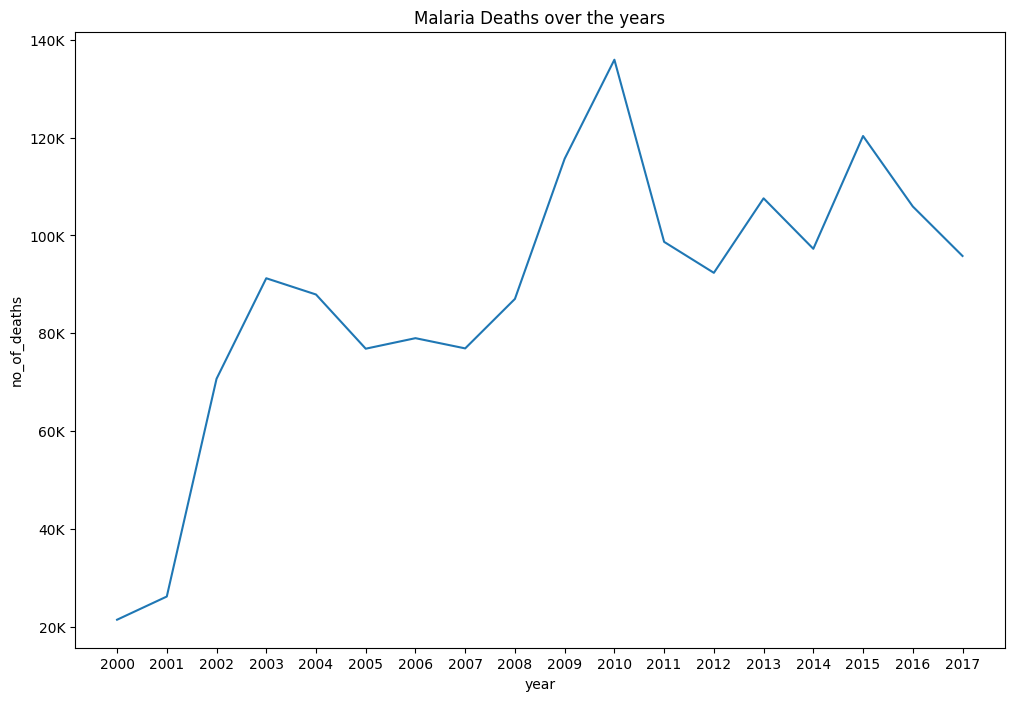

In [64]:
# Set plot size
plt.figure(figsize=(12,8))

# Create the lineplot
fig = sns.lineplot(years, x = "year", y = "no_of_deaths")

# Format the y-axis labels to display in thousand (e.g., 10K, 20K)
def millions_formatter(y, pos):
    return f'{int(y / 1_000)}K'
fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Malaria Deaths over the years")

# Display the plot
plt.show()

the idea 

## LETS BASE OUR ANALYSIS ON Ghana

we'll work with the incidence per 1000 dataset

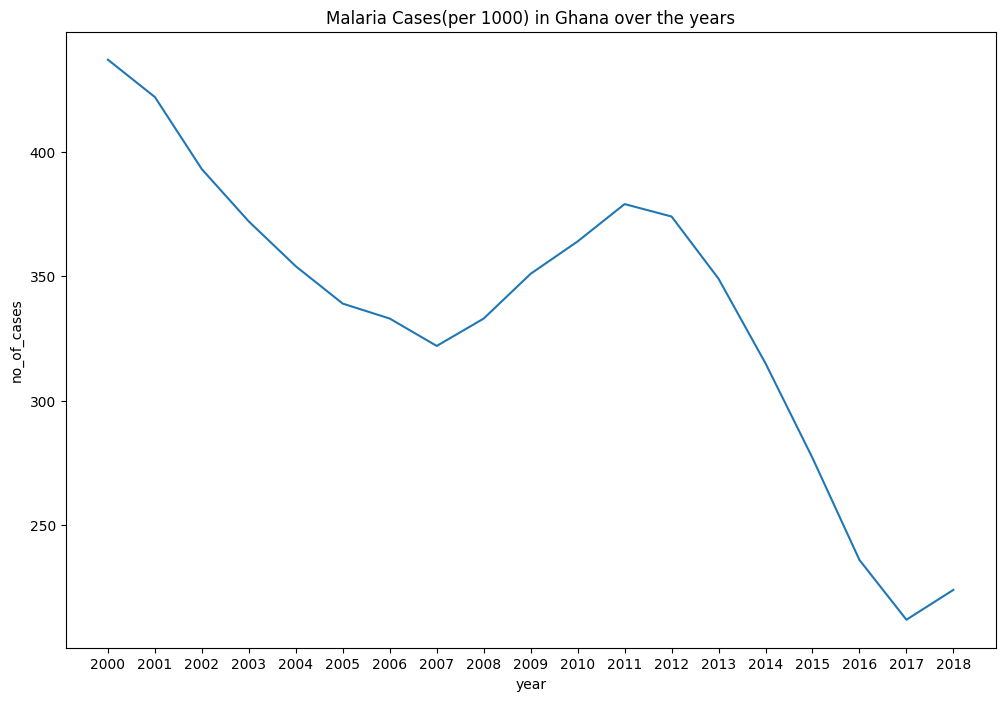

In [104]:
# Set plot size
plt.figure(figsize=(12,8))

# Create the lineplot
fig = sns.lineplot(incidence_gh_years, x = "year", y = "no_of_cases")

# Add title
fig.set_title("Malaria Cases(per 1000) in Ghana over the years")

# Display the plot
plt.show()

we can see a gradual but stead decline in malaria cases from 2000 to 2018

lets check to see if Ghana was in the top ten list of malaria incidences in 2018

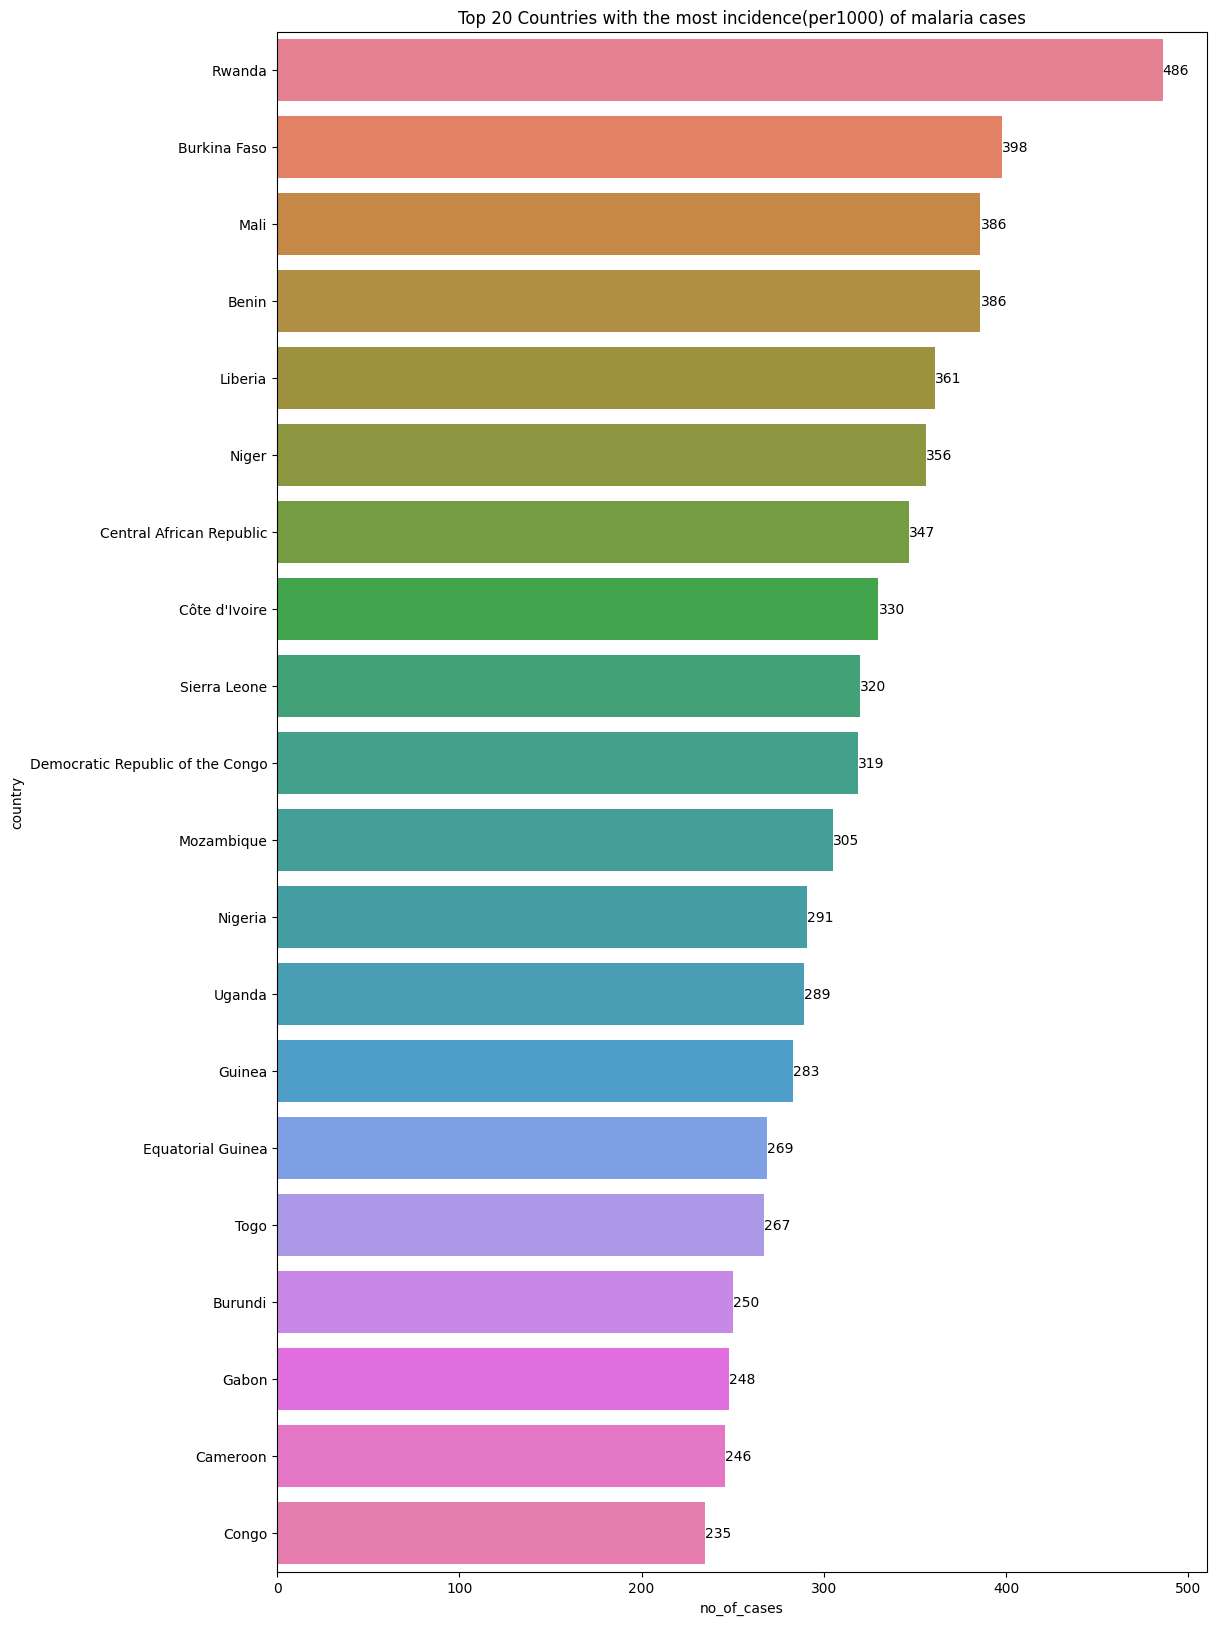

In [106]:
# Set plot size
plt.figure(figsize=(12,20))

# Create the barplot
fig = sns.barplot(data=incidence_countries,
             y="country",x="no_of_cases", hue="country")

# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar,fmt="%d")

# Add title
fig.set_title("Top 20 Countries with the most incidence(per1000) of malaria cases")

# Display the plot
plt.show()
